In [13]:
from glob import glob
import pandas as pd
from os import path
import numpy as np

In [2]:
%config Completer.use_jedi=False


In [3]:
pwd

'/home/siegman/Documents/Shahar/BarIlan/Dissertation3/code/notebooks/database'

In [4]:
hrv_files = sorted(glob('../../../data/Time_Series_Individuals/Music_final_MW_HRV*.xlsx'))

In [5]:
hrv_files[:4]

['../../../data/Time_Series_Individuals/Music_final_MW_HRV_1001_101_BL_C_Time_Series.xlsx',
 '../../../data/Time_Series_Individuals/Music_final_MW_HRV_1001_101_FS_C_Time_Series.xlsx',
 '../../../data/Time_Series_Individuals/Music_final_MW_HRV_1001_101_I_C_Time_Series.xlsx',
 '../../../data/Time_Series_Individuals/Music_final_MW_HRV_1001_102_BL_C_Time_Series.xlsx']

In [6]:
def fname_to_struct(orig_fname):
    fname = path.basename(orig_fname)
    common_start = 'Music_final_MW_HRV_'
    common_end = '_C_Time_Series.xlsx'
    if not (fname.startswith(common_start) and fname.endswith(common_end)):
        raise ValueError(f'Interesting name: {fname}')
    fname = fname[len(common_start):-len(common_end)]
    return dict(zip(['group','participant','session','path'],fname.split('_')+[orig_fname]))

In [7]:
all_files = pd.DataFrame([fname_to_struct(f) for f in hrv_files])

In [8]:
all_files

,group,participant,session,path
0,1001,101,BL,../../../data/Time_Series_Individuals/Music_fi...
1,1001,101,FS,../../../data/Time_Series_Individuals/Music_fi...
2,1001,101,I,../../../data/Time_Series_Individuals/Music_fi...
3,1001,102,BL,../../../data/Time_Series_Individuals/Music_fi...
4,1001,102,FS,../../../data/Time_Series_Individuals/Music_fi...
...,...,...,...,...
554,1051,255,I,../../../data/Time_Series_Individuals/Music_fi...
555,1051,256,BLE,../../../data/Time_Series_Individuals/Music_fi...
556,1051,256,BL,../../../data/Time_Series_Individuals/Music_fi...
557,1051,256,FS,../../../data/Time_Series_Individuals/Music_fi...


In [9]:
pd.read_excel(hrv_files[0],header=None).values.T

array([[  0.874     ,   1.374     ,   1.874     , ..., 321.374     ,
        321.874     , 322.374     ],
       [  0.738     ,   0.71568639,   0.73296834, ...,   0.91034616,
          0.909948  ,   0.91492877]])

In [10]:
def load_file(fname):
    return pd.read_excel(fname,header=None).values.T

In [17]:
data_mat = np.concatenate(all_files[:3].path.map(load_file), axis=0)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 644 and the array at index 1 has size 516

In [18]:
data_mat.shape

(2, 1633)

In [12]:
with open('../../../data/all_hrv_data.json','wt') as a:
    all_files[:5].to_json(a)

In [30]:
all_files[:5]

,group,participant,session,path,data
0,1001,101,BL,../../../data/Time_Series_Individuals/Music_fi...,"[[0.874, 1.374, 1.874, 2.374, 2.874, 3.374, 3...."
1,1001,101,FS,../../../data/Time_Series_Individuals/Music_fi...,"[[1.1560000000000001, 1.6560000000000001, 2.15..."
2,1001,101,I,../../../data/Time_Series_Individuals/Music_fi...,"[[1.35, 1.85, 2.35, 2.85, 3.35, 3.85, 4.35, 4...."
3,1001,102,BL,../../../data/Time_Series_Individuals/Music_fi...,"[[0.996, 1.496, 1.996, 2.496, 2.996, 3.496, 3...."
4,1001,102,FS,../../../data/Time_Series_Individuals/Music_fi...,"[[1.332, 1.832, 2.332, 2.832, 3.332, 3.832, 4...."


In [21]:
import json

In [24]:
len(str(all_files['data'][0].tobytes()))

28080

In [25]:
all_files['data'][0].shape

(2, 644)

In [27]:
min(all_files.data.map(lambda a: a.shape[1]))

299

In [28]:
673*2*559

752414

In [29]:
all_files.iloc[1,-1]

array([[  1.156     ,   1.656     ,   2.156     , ..., 257.656     ,
        258.156     , 258.656     ],
       [  0.902     ,   0.93266272,   0.93780025, ...,   0.89739622,
          0.91704889,   0.91593803]])

In [34]:
all_files.to_json('test_hrv.json')

In [35]:
ret  = pd.read_json('test_json.zip', compression='infer')

In [36]:
ret.head()

,group,participant,session,path,data
0,1001,101,BL,../../../data/Time_Series_Individuals/Music_fi...,"[[0.874, 1.374, 1.874, 2.374, 2.874, 3.374, 3...."
1,1001,101,FS,../../../data/Time_Series_Individuals/Music_fi...,"[[1.156, 1.6560000000000001, 2.156, 2.656, 3.1..."
2,1001,101,I,../../../data/Time_Series_Individuals/Music_fi...,"[[1.35, 1.85, 2.35, 2.85, 3.35, 3.85, 4.35, 4...."
3,1001,102,BL,../../../data/Time_Series_Individuals/Music_fi...,"[[0.996, 1.496, 1.996, 2.496, 2.996, 3.496, 3...."
4,1001,102,FS,../../../data/Time_Series_Individuals/Music_fi...,"[[1.332, 1.832, 2.332, 2.832, 3.332, 3.832, 4...."


In [44]:
ret['one']=1

In [38]:
type(ret.iloc[0,-1])

list

In [47]:
ret.pivot(index=['group','participant'], columns='session', values='one').to_excel('has_data.xlsx')

In [72]:
data_lengths = all_files[(all_files.session=='FS')][['group','data']].groupby('group')['data'].apply(list).map(lambda l: [len(k[0]) for k in l]).reset_index()
data_firsts = all_files[(all_files.session=='FS')][['group','data']].groupby('group')['data'].apply(list).map(lambda l: [k[0][0] for k in l]).reset_index()

In [73]:
data_lengths['data'].map(lambda x: max(x)-min(x)).value_counts()

1     24
2     13
0      6
3      2
4      1
5      1
49     1
Name: data, dtype: int64

In [78]:
import matplotlib.pyplot as plt

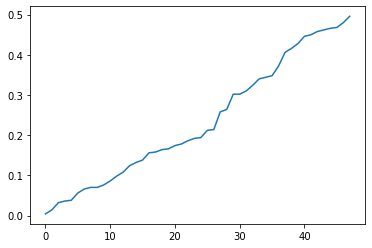

In [82]:
plt.plot(data_firsts['data'].map(lambda x: (max(x)-min(x)) % 0.5).sort_values().reset_index(drop=True))

## heart rate features

group
participant
session
filter
time 
values

## heart rate coupling features

group
participant pair
filter
coupling strength - no shift
coupling strength - max (with shift)


## drumming coupling features


- create a dataframe with the heart rate signals after all processing - avoid the need to re-process from the database
- create a dataframe with the heart rate coupling 